semana 8: https://youtu.be/on8FafPG9jc?si=hUK2p8zLoDZHcf8r
ppt: https://drive.google.com/file/d/18kok6EX8qbxJ83hxiS2XHggeCTW8Nyda/view?usp=sharing

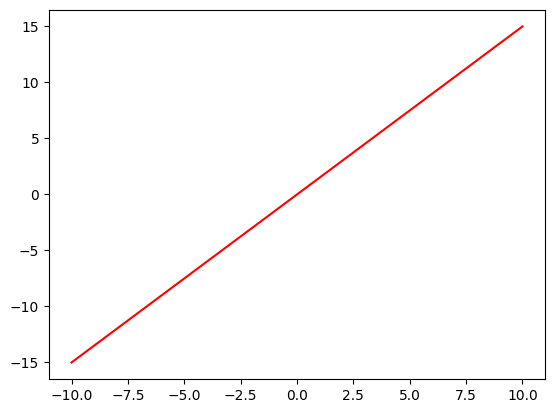

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
x= np.linspace(-10,10)
y=0+ 1.5*x
plt.plot(x,y,'r')
plt.show()

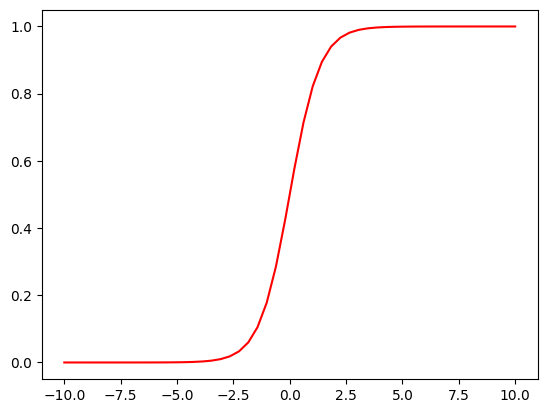

In [3]:
def function(data): 
    return 1/(1+math.e**(-1.5*data))
yl = function(x) 
plt.plot(x,yl,'r')
plt.show()

In [4]:
import pandas as pd
#df = pd.read_csv('train.csv') 
df = pd.read_csv(r'G:\OneDrive - Universidad Tecnologica del Peru\Estudios\Cursos\Analisis de Datos\Ciencia de Datos con Python IEEE AESS\codigo\base de datos\train.csv') 

df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
df.Survived.describe() #38% sobrevivieron

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

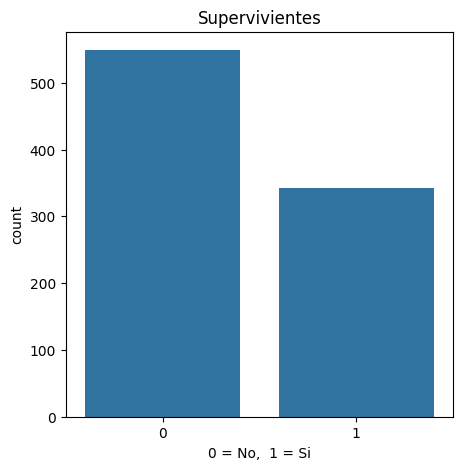

In [7]:
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.countplot(x='Survived', data = df)
plt.title('Supervivientes')
plt.xlabel('0 = No,  1 = Si')
plt.show()

In [8]:
supervivientes = np.sum(df.Survived) 
print(supervivientes)

342


In [9]:
noSupervivientes = df.shape[0] - np.sum(df.Survived) 
print(noSupervivientes)

549


In [10]:
supervivientes/df.shape[0]

0.3838383838383838

In [11]:
noSupervivientes/df.shape[0]

0.6161616161616161

In [12]:
df [df['Sex'].str.match('female')].Sex.count()

314

In [13]:
df [df['Sex'].str.match('male')].Sex.count()

577

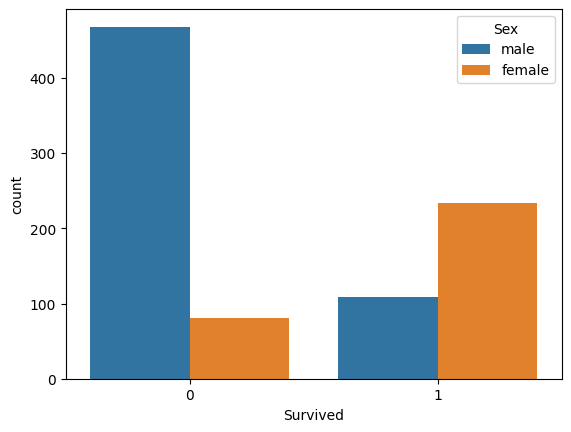

In [14]:
sns.countplot(x='Survived', hue='Sex', data = df)  #0 no sobrevivio, 1 si sobrevivio

plt.show()

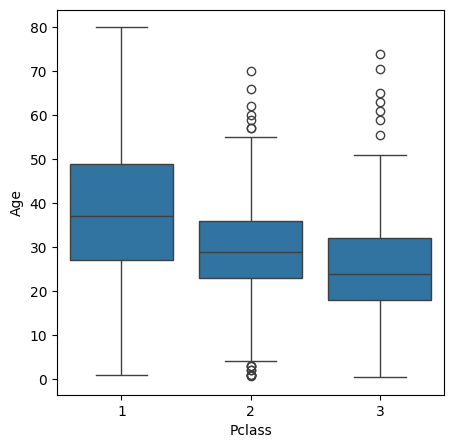

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(x='Pclass', y='Age', data= df)
plt.show()

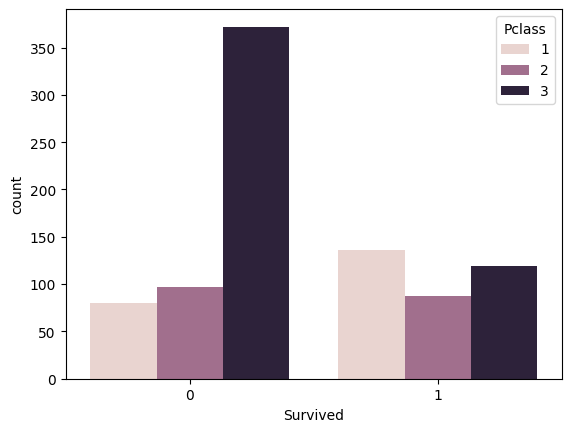

In [16]:
sns.countplot(x='Survived', hue='Pclass', data = df)
plt.show()

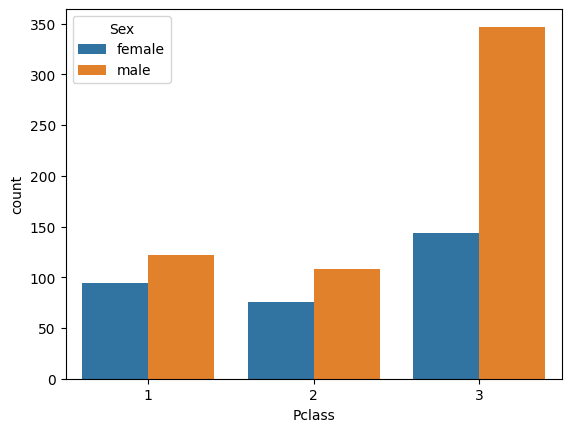

In [17]:
sns.countplot(x='Pclass', hue='Sex', data = df)
plt.show()

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df=df.drop(['PassengerId', 'Cabin', 'Name', 'Ticket', 'Age'], axis=1)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [20]:
genders = {'male': 0, 'female': 1}
data = [df]
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,S
1,1,1,1,1,0,71.2833,C
2,1,3,1,0,0,7.9250,S
3,1,1,1,1,0,53.1000,S
4,0,3,0,0,0,8.0500,S


In [21]:
df ['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
df ['Embarked'].isnull().sum()

2

In [23]:
common_value = 's'
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [24]:
df ['Embarked'].isnull().sum()

0

In [25]:
ports = {'S': 0, 'C': 1, 'Q':2}
data = [df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports).fillna(0).astype('int64')  # Convertir a int64
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


In [26]:
for dataset in data:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 10, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 20), 'Fare'] = int(1)
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 30), 'Fare'] = int(2)
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = int(3)
    dataset.loc[(dataset['Fare'] > 100) & (dataset['Fare'] <= 250), 'Fare'] = int(4)
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = int(5)
    

In [27]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [28]:
X_data = df.drop('Survived', axis=1) 
y_survived = df['Survived']


In [29]:
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_text, y_train, y_test = train_test_split(X_data, y_survived, test_size= 0.3, random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [32]:
y_predict =logmodel.predict(X_text)

In [33]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_test, y_predict)

array([[133,  24],
       [ 32,  79]], dtype=int64)

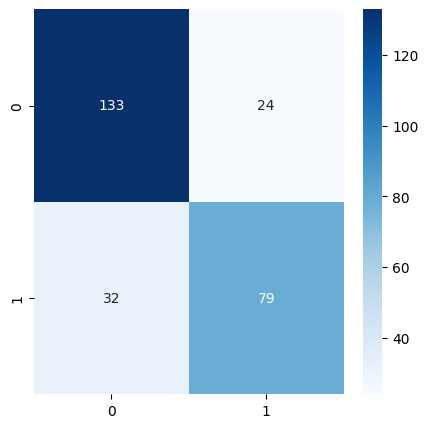

In [34]:
plt.figure(figsize= (5,5))
sns.heatmap(confusion_matrix(y_test, y_predict), annot= True, fmt='g', cmap='Blues')
plt.show()

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [37]:
df.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,0,0
1,1,1,1,1,0,3,1
2,1,3,1,0,0,0,0
3,1,1,1,1,0,3,0
4,0,3,0,0,0,0,0


In [38]:
df.to_csv('titanic_clean.csv', header=True)